In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [2]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/distan_lat42.77lon-1.647p3R12Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

**Load actual data (wind direction and wind speed) from station (dir -1 means variable direcction)**

In [4]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/LEPP2018.csv",
                          usecols = ["time","dir_o","spd_o"],
                          parse_dates=["time"]).set_index("time")
station.describe()

,dir_o,spd_o
count,17692.000000,17692.000000
mean,191.806918,3.046159
std,136.201638,2.537009
min,-1.000000,0.000000
25%,30.000000,1.028888
50%,210.000000,2.572220
75%,320.000000,4.629996
max,360.000000,15.433320


**Climatology labeled and relationship variable wind (VRB) and wind intensity**

In [9]:
#wind direction to interval dir=-1 variable wind
interval = pd.IntervalIndex.from_tuples([(-1.5, -0.5),(-0.5,20), (20, 40), (40, 60),
                                           (60,80),(80,100),(100,120),(120,140),(140,160),
                                           (160,180),(180,200),(200,220),(220,240),
                                           (240,260),(260,280),(280,300),(300,320),
                                           (320,340),(340,360)])

labels = ['VRB', '[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]',
          '(100, 120]', '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]',
          '(200, 220]','(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]',
          '(300, 320]', '(320, 340]', '(340, 360]']

station["dir_l"] = pd.cut(station["dir_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')


#observed climatology
print("wind direction climatology\n")
print(station["dir_l"].value_counts(normalize= True).transform(lambda x: '{:,.0%}'.format(x)))

station["spd_o_kt"]=np.rint(station["spd_o"]*1.94384)
print("\nwind intensity percentage (kt) when wind variable\n")
print(station[station.dir_l=="VRB"]["spd_o_kt"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x)))
print("\nwind direction when wind speed equal or less than 3 kt\n")
station[station.spd_o_kt<=3]["dir_l"].value_counts(normalize = True).transform(lambda x: '{:,.0%}'.format(x))


wind direction climatology

(300, 320]    18%
(320, 340]    15%
VRB           13%
[0, 20]       12%
(280, 300]     6%
(340, 360]     6%
(140, 160]     5%
(160, 180]     4%
(120, 140]     4%
(100, 120]     3%
(180, 200]     3%
(260, 280]     2%
(80, 100]      2%
(60, 80]       2%
(200, 220]     1%
(40, 60]       1%
(240, 260]     1%
(20, 40]       1%
(220, 240]     1%
Name: dir_l, dtype: object

wind intensity percentage (kt) when wind variable

2.0    49%
1.0    48%
3.0     2%
4.0     1%
5.0     0%
6.0     0%
7.0     0%
8.0     0%
Name: spd_o_kt, dtype: object

wind direction when wind speed equal or less than 3 kt



VRB           31%
[0, 20]       24%
(280, 300]     6%
(300, 320]     5%
(140, 160]     4%
(160, 180]     4%
(260, 280]     3%
(60, 80]       3%
(320, 340]     3%
(120, 140]     2%
(40, 60]       2%
(80, 100]      2%
(340, 360]     2%
(240, 260]     2%
(20, 40]       2%
(100, 120]     1%
(180, 200]     1%
(220, 240]     1%
(200, 220]     1%
Name: dir_l, dtype: object

**Forecast D0**

In [6]:
#forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEPP/input_files/lat42.77lon-1.647p3R12KmD0.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,292.052490,0.0,553.941833,0.587827,0.958378,102771.531250,274.759369,0.946349,24224.912109,-0.048682,...,0.0,-0.001094,0.00,0.0,0.0,0.00,5483.839844,1544.834961,244.594223,272.421326
2018-01-01 02:00:00,196.488373,0.0,613.525208,1.296904,11.657522,102834.796875,274.350494,0.946008,24224.343750,-0.377661,...,0.0,0.001953,0.00,0.0,0.0,0.00,5499.091797,1549.441040,245.285736,272.807495
2018-01-01 03:00:00,186.363007,0.0,661.109863,4.245080,5.900322,102882.640625,274.785828,0.914341,24221.205078,0.422974,...,0.0,-0.004102,0.00,0.0,0.0,0.00,5511.755859,1552.350952,245.793243,273.134460
2018-01-01 04:00:00,189.292435,0.0,694.456299,4.445677,5.976796,102938.546875,275.039307,0.902506,24219.220703,1.974560,...,0.0,-0.002734,0.00,0.0,0.0,0.00,5524.407227,1558.574951,246.264526,273.393463
2018-01-01 05:00:00,194.010376,0.0,726.301025,4.055670,5.694401,102932.867188,275.172119,0.895605,24218.425781,2.065991,...,0.0,0.001211,0.00,0.0,0.0,0.00,5532.286133,1559.514038,246.827194,273.539368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,1.414751,0.0,1970.248535,6.084242,7.562932,103258.039062,280.895203,0.730230,24041.951172,42.388092,...,0.0,0.001211,0.30,0.0,0.0,0.30,5738.210938,1633.965942,256.457489,283.896637
2018-12-31 20:00:00,356.427704,0.0,1936.104858,5.687714,7.142657,103287.882812,280.499054,0.743425,24041.025391,36.874725,...,0.0,-0.000898,0.20,0.0,0.0,0.20,5739.144043,1634.055054,256.369995,283.659424
2018-12-31 21:00:00,352.389984,0.0,1902.936279,5.291308,6.723206,103340.562500,280.019501,0.756728,24041.576172,31.069885,...,0.0,-0.003398,0.14,0.0,0.0,0.14,5741.472168,1636.801025,256.276123,283.307068


**Delete rows with wind direction variable obseved**

In [10]:
#concat station vs meteorological  model. Delete variable (VRB) observed direction
df_vrb = pd.concat([station,model1k],axis=1).drop(columns=["spd_o","spd_o_kt"]).dropna()
df_all1k = df_vrb[df_vrb.dir_o!=-1]
df_all1k

,dir_o,dir_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,...,cape2,cin2,cfh2,cfl2,cfm2,cft2,HGT5002,HGT8502,T5002,T8502
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,70.0,"(60, 80]",292.052490,0.0,553.941833,0.587827,0.958378,102771.531250,274.759369,0.946349,...,0.0,-0.001094,0.000000,0.0,0.000000,0.000000,5483.839844,1544.834961,244.594223,272.421326
2018-01-01 03:00:00,150.0,"(140, 160]",186.363007,0.0,661.109863,4.245080,5.900322,102882.640625,274.785828,0.914341,...,0.0,-0.004102,0.000000,0.0,0.000000,0.000000,5511.755859,1552.350952,245.793243,273.134460
2018-01-01 04:00:00,340.0,"(320, 340]",189.292435,0.0,694.456299,4.445677,5.976796,102938.546875,275.039307,0.902506,...,0.0,-0.002734,0.000000,0.0,0.000000,0.000000,5524.407227,1558.574951,246.264526,273.393463
2018-01-01 06:00:00,0.0,"[0, 20]",183.891724,0.0,782.370361,3.140616,11.380304,102906.851562,274.691315,0.923594,...,0.0,-0.002109,0.000000,0.0,0.000000,0.000000,5537.683105,1559.758057,247.471375,273.874420
2018-01-01 08:00:00,0.0,"[0, 20]",175.984726,0.0,878.090942,5.004853,14.736691,102865.812500,275.810883,0.883195,...,0.0,0.004766,0.093750,0.0,0.140625,0.140625,5546.558105,1558.229980,247.894577,274.816315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30 18:00:00,280.0,"(260, 280]",358.942017,0.0,1822.514160,5.258572,8.331446,103248.718750,280.078552,0.700275,...,0.0,0.000336,0.200000,0.0,0.100000,0.200000,5716.402832,1631.104980,253.284378,283.791595
2018-12-30 19:00:00,310.0,"(300, 320]",358.645508,0.0,1839.476074,5.126672,8.322812,103263.937500,280.152435,0.710311,...,0.0,0.000348,0.171875,0.0,0.000000,0.171875,5717.753906,1633.006958,253.165436,283.871216
2018-12-30 20:00:00,30.0,"(20, 40]",0.639470,0.0,1837.982666,5.114498,6.669627,103287.609375,280.086426,0.717648,...,0.0,0.000320,0.101562,0.0,0.000000,0.101562,5719.474121,1634.531006,253.151443,283.921692


**Label meteorological points 0 and 1**

In [11]:
#label meteorological model variables dir0 and dir1
df_all1k["dir0_l"] = pd.cut(df_all1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')
df_all1k["dir1_l"] = pd.cut(df_all1k["dir1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype('category')

df_all1k[["dir_l","dir0_l","dir1_l"]].sample(20)

<ipython-input-11-d2a85177323f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-d2a85177323f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dir_l,dir0_l,dir1_l
time,,,
2018-09-29 02:00:00,"[0, 20]","(340, 360]","[0, 20]"
2018-10-16 01:00:00,"[0, 20]","(40, 60]","(80, 100]"
2018-12-25 01:00:00,"(60, 80]","[0, 20]","(20, 40]"
2018-09-23 16:00:00,"[0, 20]","(340, 360]","(340, 360]"
2018-06-08 03:00:00,"(180, 200]","(100, 120]","(100, 120]"
2018-09-01 14:00:00,"(300, 320]","(340, 360]","(340, 360]"
2018-10-08 08:00:00,"(300, 320]","(340, 360]","(340, 360]"
2018-06-29 01:00:00,"(260, 280]","[0, 20]","[0, 20]"
2018-11-22 06:00:00,"(180, 200]","(120, 140]","(120, 140]"


**meteorological model score point 0**

****

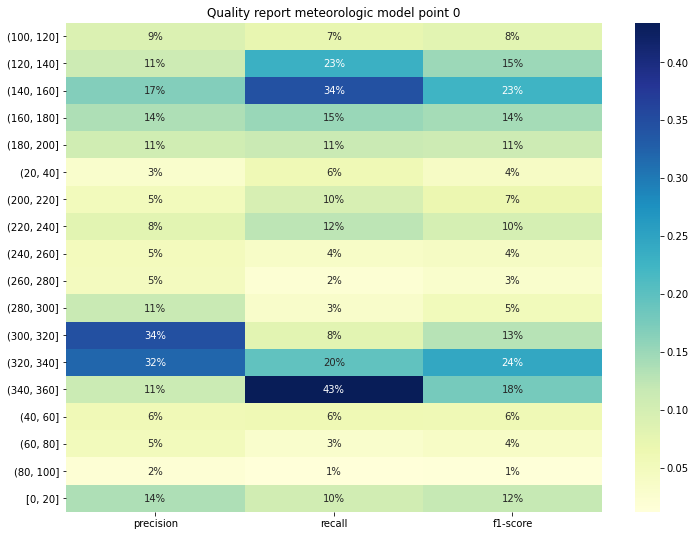

In [12]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 0")
cr = pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

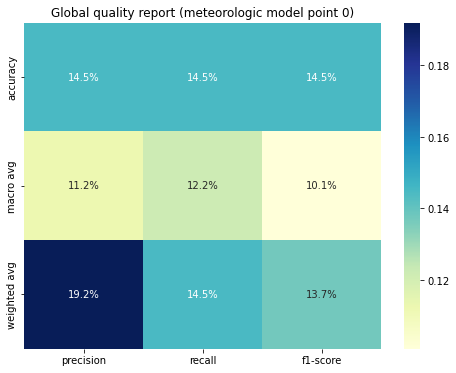

In [13]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 0)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

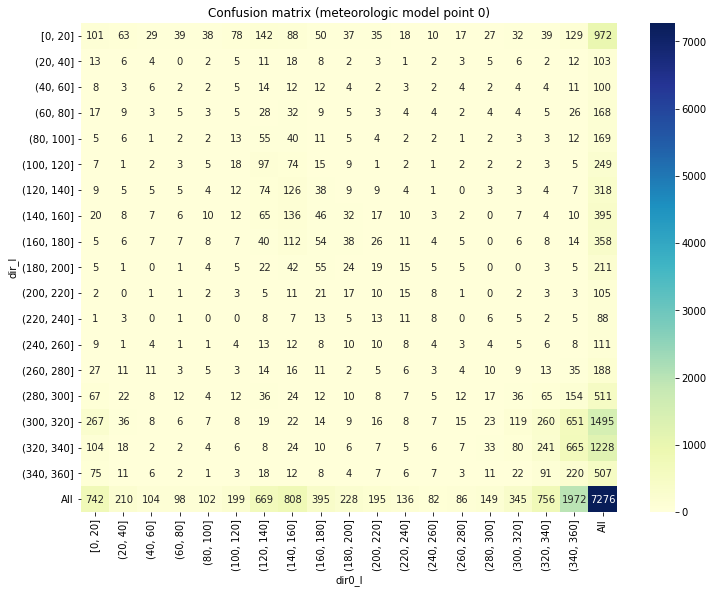

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 0)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

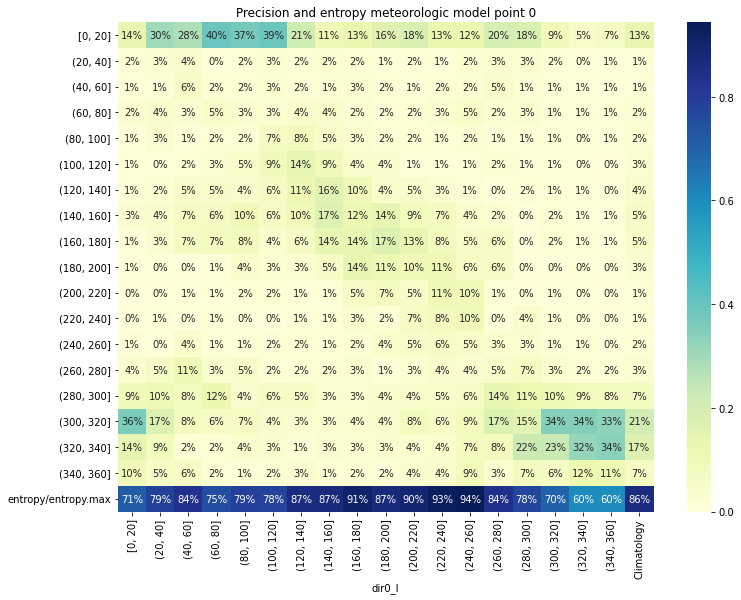

In [15]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 0")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**meteorological model score point 1**

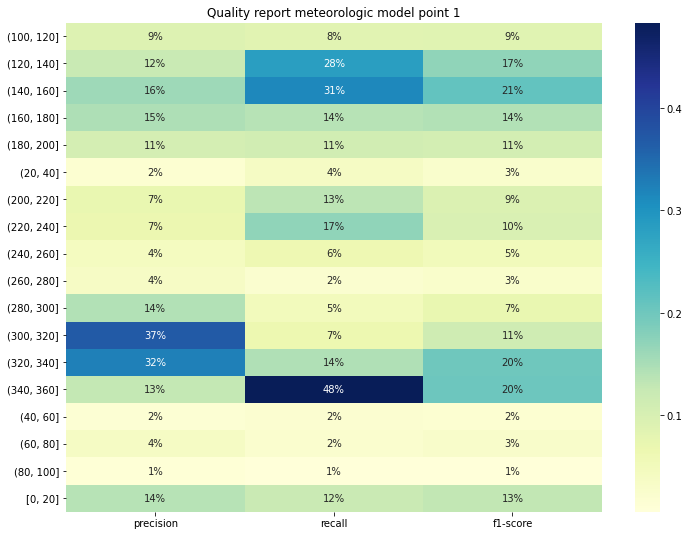

In [16]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model point 1")
cr=pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir1_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

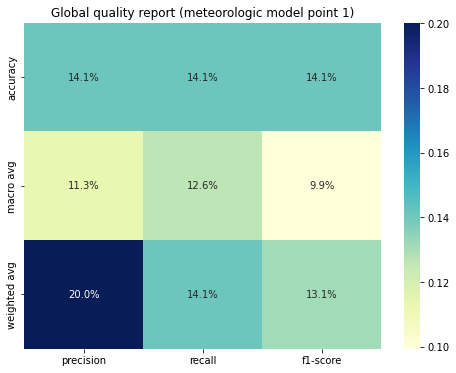

In [17]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model point 1)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

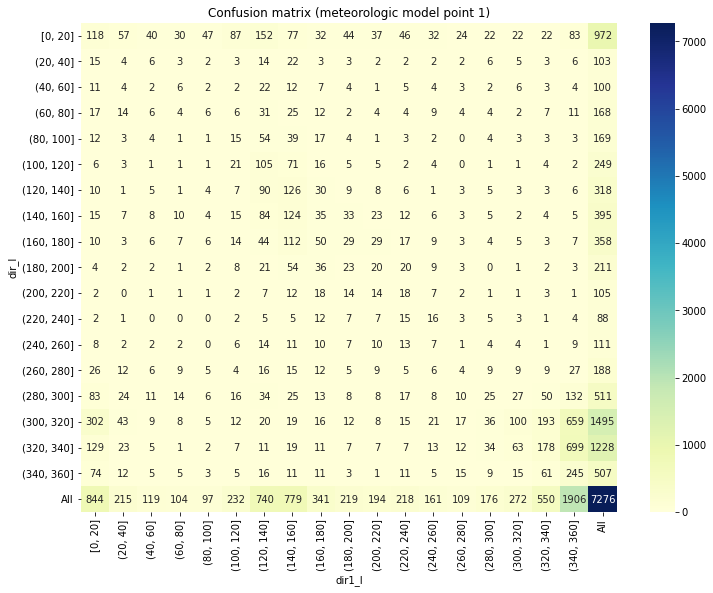

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model point 1)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir1_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

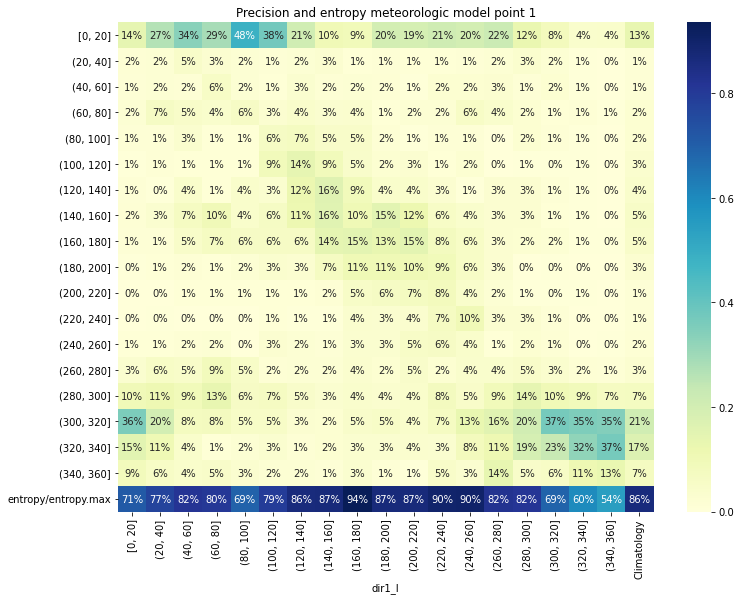

In [19]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model point 1")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir1_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**T test accuracy (2 samples) at point 0 and point 1. Best point 1. Significance level (alpha) = 0.01.
Test two sides and one side**

In [20]:
from sklearn.metrics import accuracy_score
import scipy.stats as stats

#Accuracy in 10 samples
concat = df_all1k[["dir_l","dir0_l","dir1_l"]]
acc_met0 = []
acc_met1 = []

for t in range (0,10):
  #sample lenght as y_test machine learning
  concat_t = concat.sample(2472)
  acc_met0.append(round(accuracy_score(concat_t["dir_l"], concat_t["dir0_l"]),2))
  acc_met1.append(round(accuracy_score(concat_t["dir_l"], concat_t["dir1_l"]),2))

print(pd.DataFrame(acc_met0,columns=["Accuracy point 0"]).describe()) 
print("\nAccuracy list point 0:") 
acc0 = np.around(acc_met0, decimals=2)
print(acc0)
print("****************")
print(pd.DataFrame(acc_met1,columns=["Accuracy point 1"]).describe()) 
print("\nAccuracy list point 1:") 
acc1 = np.around(acc_met1, decimals=2)
print(acc1)

#two samples t test two sides
alpha = 0.01
_,p_value=stats.ttest_ind(acc0,acc1,equal_var= False)

print("\nt test two samples two sides")
print("\np_value:",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0 accuracy mean point0= accuracy mean point 1")
    print("\nwe are accepting alternative hypothesis  accuracy mean point0 not equal accuracy mean point 1")
else:
    print("\nwe are accepting null hypothesis  H0 accuracy mean point0= accuracy mean point 1")

#two samples t test one side
#alternative hypothesis the mean of the distribution underlying the first sample is less than 
#the mean of the distribution underlying the second sample.

_,p_value=stats.ttest_ind(acc0,acc1,equal_var= False,alternative="less")

print("\nt test two samples one side")
print("\np_value:",p_value)
alpha = 0.01
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean point0= accuracy mean point 1")
    print("\nwe are accepting alternative hypothesis: accuracy mean point0 is less than accuracy mean point 1")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")



       Accuracy point 0
count         20.000000
mean           0.142500
std            0.005501
min            0.130000
25%            0.140000
50%            0.140000
75%            0.150000
max            0.150000

Accuracy list point 0:
[0.14 0.14 0.15 0.15 0.14 0.15 0.14 0.15 0.14 0.14 0.14 0.14 0.14 0.14
 0.13 0.15 0.14 0.14 0.14 0.15]
****************
       Accuracy point 1
count         20.000000
mean           0.140500
std            0.005104
min            0.130000
25%            0.140000
50%            0.140000
75%            0.140000
max            0.150000

Accuracy list point 1:
[0.13 0.14 0.14 0.15 0.14 0.14 0.14 0.15 0.14 0.14 0.14 0.14 0.14 0.14
 0.13 0.14 0.14 0.14 0.15 0.14]

t test two samples two sides

p_value: 0.24074271808777367

we are accepting null hypothesis  H0 accuracy mean point0= accuracy mean point 1

t test two samples one side

p_value: 0.8796286409561132

we are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point 


**Test association between observed variable and meteorological model (point 0) (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [21]:
#two way table
pd.crosstab(df_all1k.dir_l,df_all1k.dir0_l)

dir0_l,"[0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]","(100, 120]","(120, 140]","(140, 160]","(160, 180]","(180, 200]","(200, 220]","(220, 240]","(240, 260]","(260, 280]","(280, 300]","(300, 320]","(320, 340]","(340, 360]"
dir_l,,,,,,,,,,,,,,,,,,
"[0, 20]",101,63,29,39,38,78,142,88,50,37,35,18,10,17,27,32,39,129
"(20, 40]",13,6,4,0,2,5,11,18,8,2,3,1,2,3,5,6,2,12
"(40, 60]",8,3,6,2,2,5,14,12,12,4,2,3,2,4,2,4,4,11
"(60, 80]",17,9,3,5,3,5,28,32,9,5,3,4,4,2,4,4,5,26
"(80, 100]",5,6,1,2,2,13,55,40,11,5,4,2,2,1,2,3,3,12
"(100, 120]",7,1,2,3,5,18,97,74,15,9,1,2,1,2,2,2,3,5
"(120, 140]",9,5,5,5,4,12,74,126,38,9,9,4,1,0,3,3,4,7
"(140, 160]",20,8,7,6,10,12,65,136,46,32,17,10,3,2,0,7,4,10
"(160, 180]",5,6,7,7,8,7,40,112,54,38,26,11,4,5,0,6,8,14


**All cells must be more than five!!!. No Chi square test posible**

In [22]:
from scipy.stats import chi2_contingency

alpha = 0.01

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(pd.crosstab(df_all1k.dir_l,df_all1k.dir0_l))

#degrees of freedoom (rows-1)*(columns-1) to test associationbetween two variables

print('p-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Stadistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between meteorological model variables and observed values")
else:
    print("Retain H0,There is no association between meteorological model variables and observed values")

p-value: 0.0
Significance level: 0.01
Degres of of freedom:  289
Stadistic 5383.174480020497
Reject H0,There is an association between meteorological model variables and observed values


In [23]:
df_vrb.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502'],
      dtype='object')

**Machine learning**

In [24]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [04:00<00:00,  8.30s/it]


In [25]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.35,0.23,None,0.34,2.97
RandomForestClassifier,0.36,0.22,None,0.34,5.90
LGBMClassifier,0.35,0.20,None,0.32,32.14
LabelSpreading,0.29,0.20,None,0.29,3.98
LabelPropagation,0.29,0.20,None,0.29,2.13
BaggingClassifier,0.31,0.18,None,0.29,4.88
KNeighborsClassifier,0.30,0.18,None,0.29,0.56
ExtraTreeClassifier,0.25,0.18,None,0.25,0.11
LinearDiscriminantAnalysis,0.30,0.17,None,0.27,0.26


**Compare Machine learning accuracy vs meteorological model accuracy point 0 and 1.**


Quality report (Machine Learning)

              precision  recall  f1-score  support
(100, 120]         0.52    0.36      0.43    36.00
(120, 140]         0.31    0.20      0.25    44.00
(140, 160]         0.27    0.25      0.26    53.00
(160, 180]         0.21    0.18      0.19    38.00
(180, 200]         0.44    0.18      0.26    38.00
(20, 40]           0.00    0.00      0.00    14.00
(200, 220]         0.00    0.00      0.00    18.00
(220, 240]         0.00    0.00      0.00    14.00
(240, 260]         0.00    0.00      0.00    11.00
(260, 280]         0.00    0.00      0.00    26.00
(280, 300]         0.33    0.16      0.22    87.00
(300, 320]         0.39    0.64      0.49   219.00
(320, 340]         0.50    0.39      0.44   216.00
(340, 360]         0.43    0.20      0.28    59.00
(40, 60]           0.00    0.00      0.00    17.00
(60, 80]           0.00    0.00      0.00    26.00
(80, 100]          0.10    0.03      0.05    29.00
VRB                0.28    0.51      0.36   16

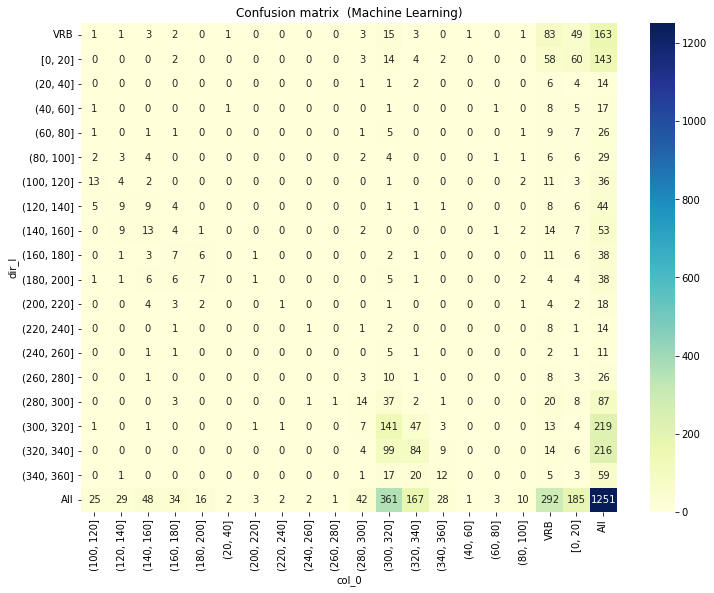

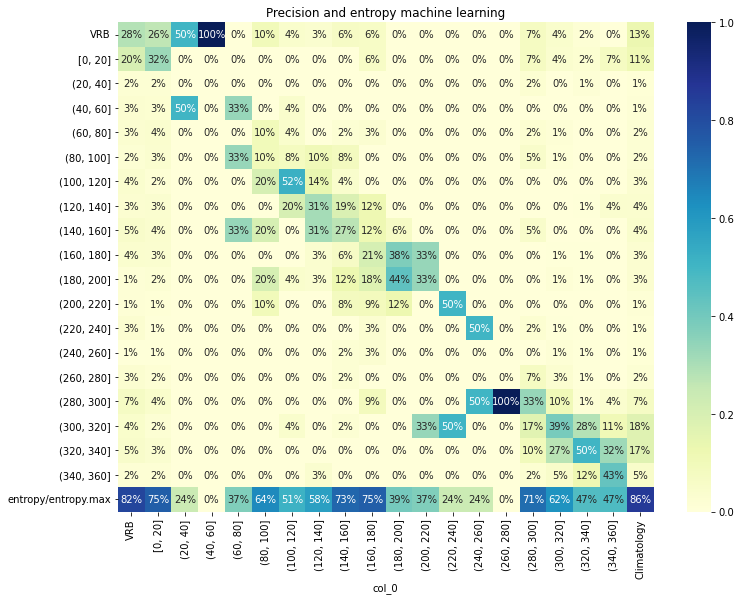

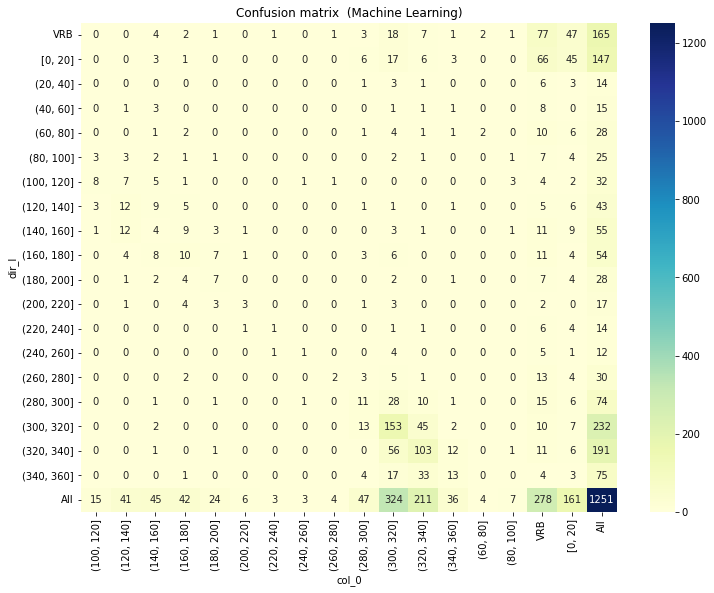

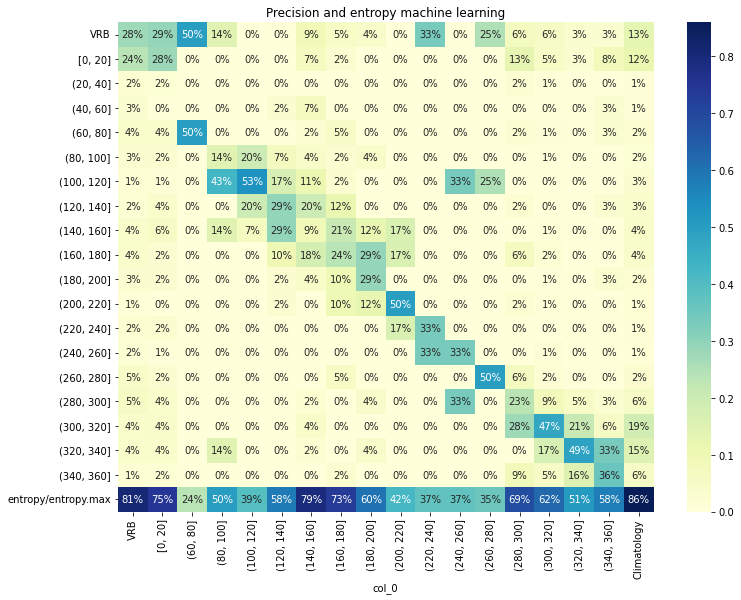

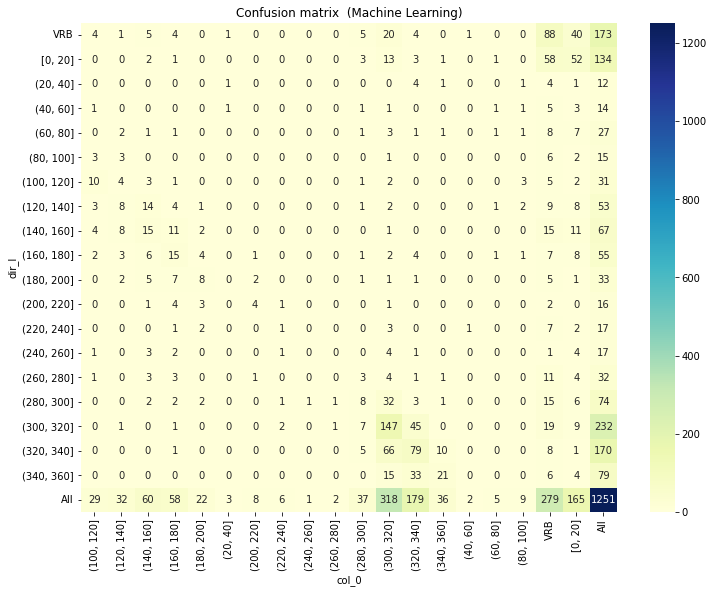

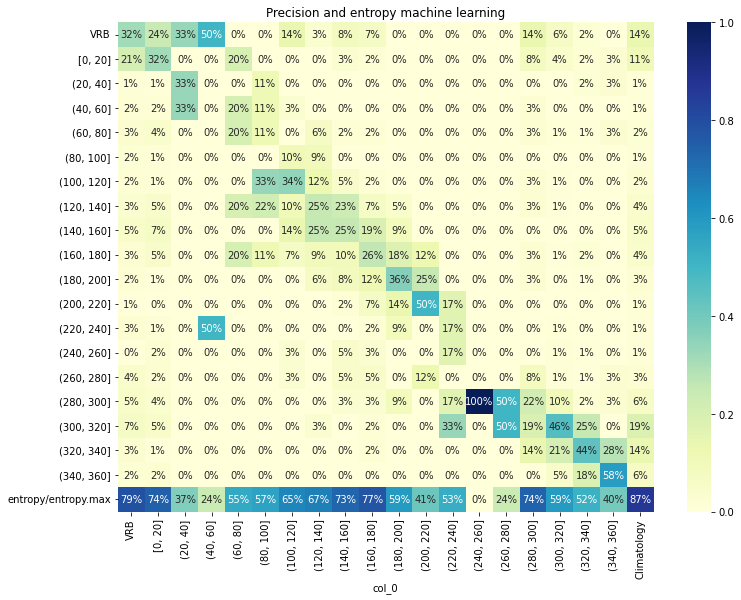

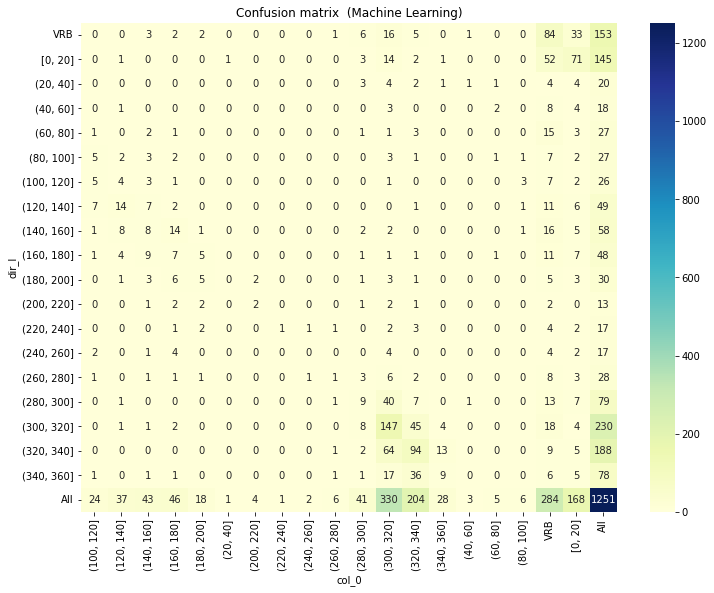

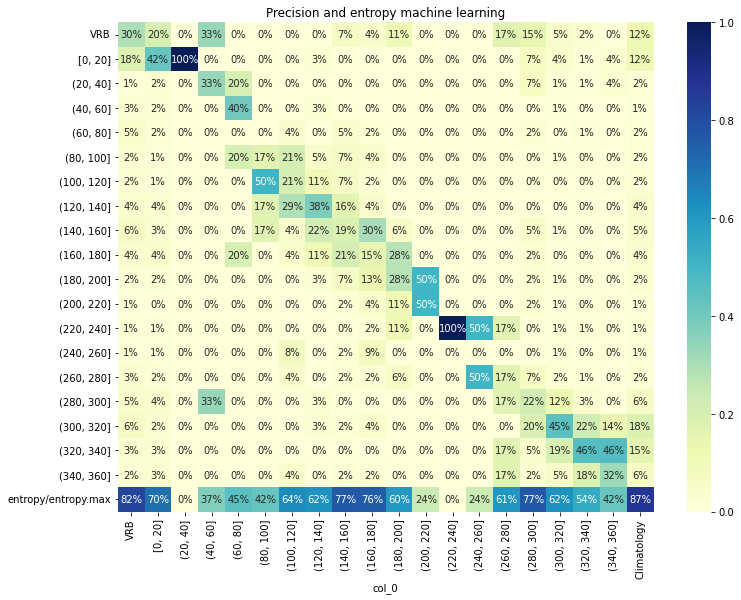

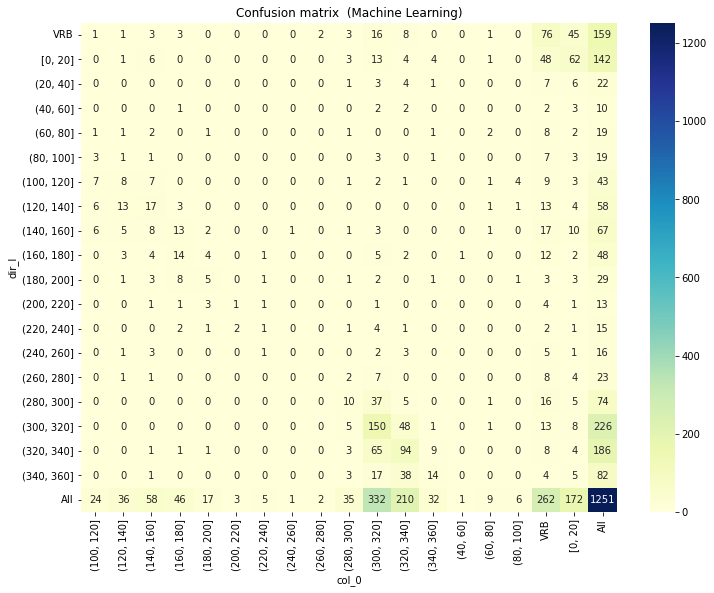

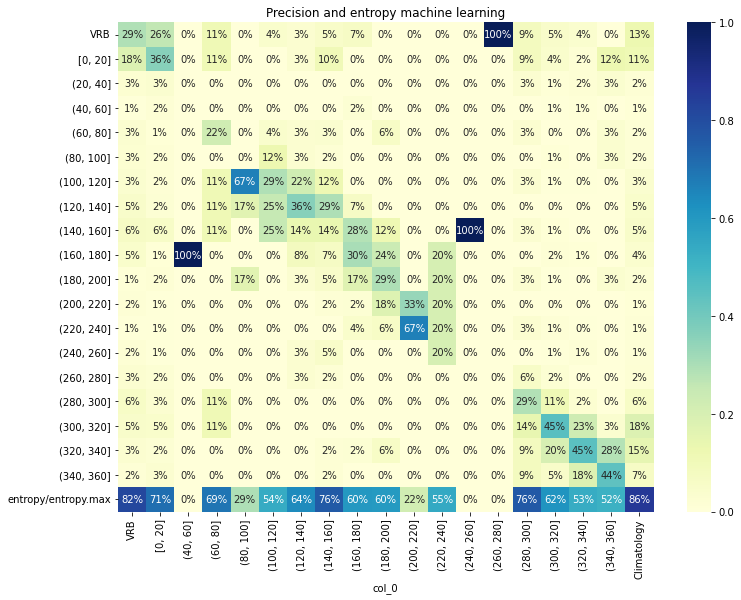

In [59]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,5):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  plt.figure(figsize=(12, 9))
  plt.title("Confusion matrix  (Machine Learning)")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  plt.figure(figsize=(12, 9))
  plt.title("Precision and entropy machine learning")
  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
  comuns = [element for element in labels+["Climatology"] if element in column_sc.columns]                  
  sns.heatmap(column_sc[comuns],annot=True,cmap="YlGnBu",fmt='.0%');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\n accuracy mean of samples: ",acc_ml)



**T test (1sample) compare machine learning mean accuracy in a sample (n=5) versus meteorological model mean accuracy at point 0 (14%) and at point 1 (14%).
the alternative hypothesis is: the mean of the underlying distribution 
of the sample is greater than the given population mean (popmean). Significance level (alpha) = 0.01**

In [60]:
from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(acc_ml, popmean=0.14, alternative="greater")
sta1, p_value1 = stats.ttest_1samp(acc_ml, popmean=0.14, alternative="greater")

print("\nalpha: ",alpha)

print("\naccuracy list from machine learning test:",acc_ml)
print("\n**** Point 0 ****")
print("\np_value point 0:",p_value0)
if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")

print("\n**** Point 1 ****")
print("\np value point 1:",p_value1 )
if p_value1 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 1")
    print("\nwe are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 1")
else:
    print("\nwe are accepting null hypothesis:  H0 accuracy mean point0= accuracy mean point ")    


alpha:  0.01

accuracy list from machine learning test: [0.35, 0.36, 0.37, 0.37, 0.37]

**** Point 0 ****

p_value point 0: 3.0440127377806394e-07

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 0

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 0

**** Point 1 ****

p value point 1: 3.0440127377806394e-07

we are rejecting null hypothesis  H0: accuracy mean machine learning= accuracy mean meteorological model point 1

we are accepting alternative hypothesis: accuracy mean machine learning is greater than accuracy mean meteorological point 1


**Add time variables**

In [29]:
df_vrb["hour"] = df_vrb.index.hour
df_vrb["month"] = df_vrb.index.month
df_vrb["dayofyear"] = df_vrb.index.dayofyear
df_vrb["weekofyear"] = df_vrb.index.isocalendar().week.astype(int)

In [61]:
df_vrb.iloc[:,2:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')


 Quality report (Machine Learning)

              precision  recall  f1-score  support
(100, 120]         0.52    0.36      0.43    36.00
(120, 140]         0.31    0.20      0.25    44.00
(140, 160]         0.27    0.25      0.26    53.00
(160, 180]         0.21    0.18      0.19    38.00
(180, 200]         0.44    0.18      0.26    38.00
(20, 40]           0.00    0.00      0.00    14.00
(200, 220]         0.00    0.00      0.00    18.00
(220, 240]         0.00    0.00      0.00    14.00
(240, 260]         0.00    0.00      0.00    11.00
(260, 280]         0.00    0.00      0.00    26.00
(280, 300]         0.33    0.16      0.22    87.00
(300, 320]         0.39    0.64      0.49   219.00
(320, 340]         0.50    0.39      0.44   216.00
(340, 360]         0.43    0.20      0.28    59.00
(40, 60]           0.00    0.00      0.00    17.00
(60, 80]           0.00    0.00      0.00    26.00
(80, 100]          0.10    0.03      0.05    29.00
VRB                0.28    0.51      0.36   1

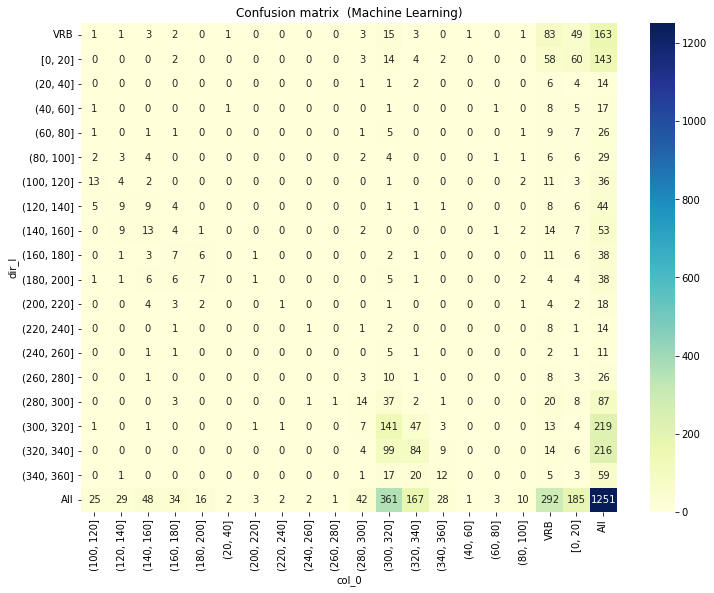

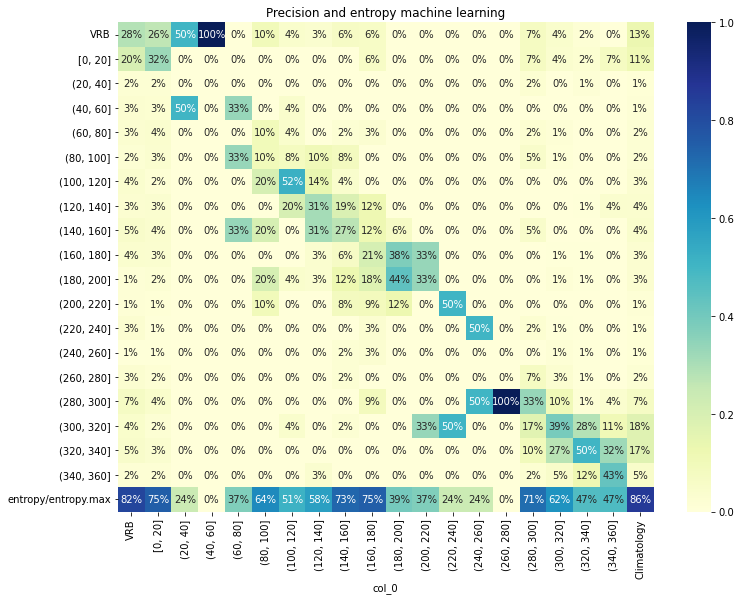

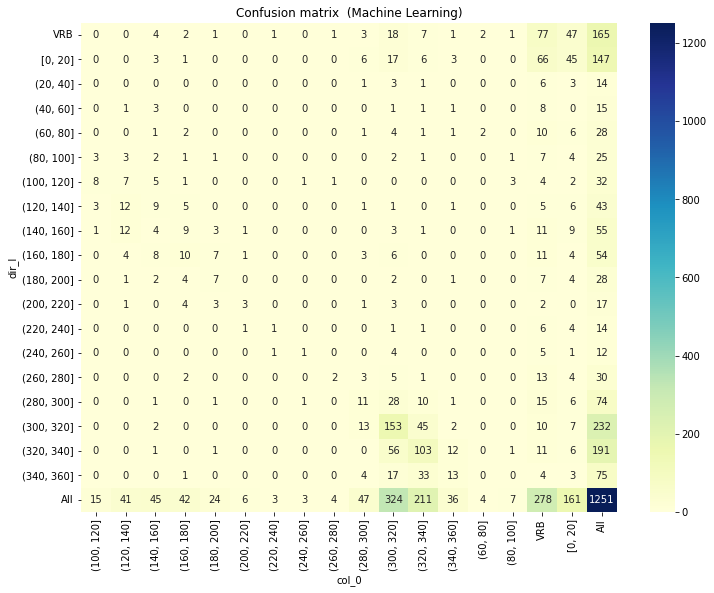

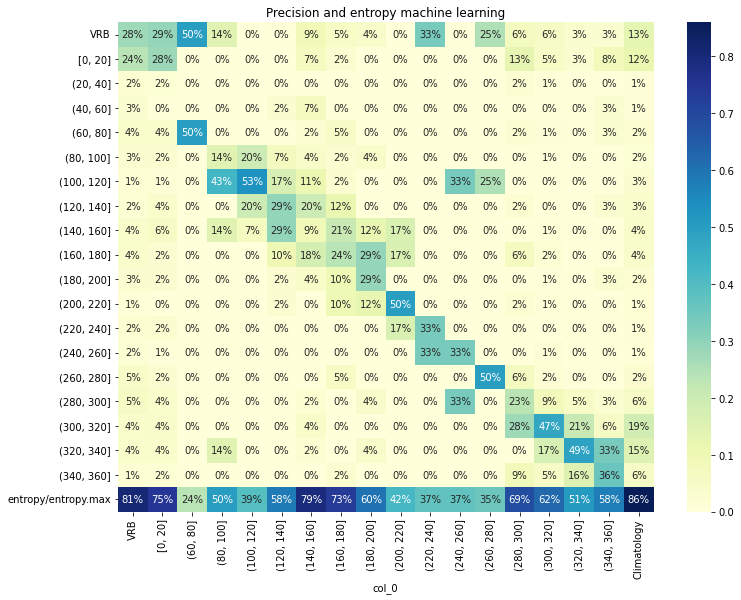

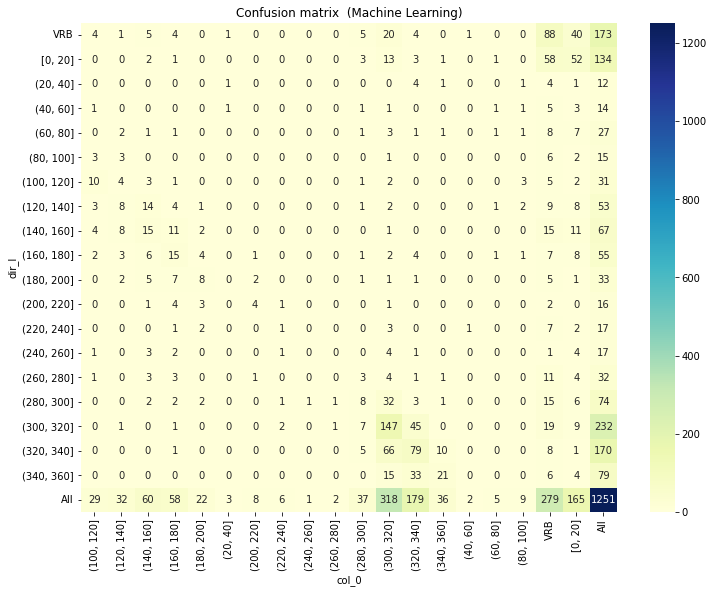

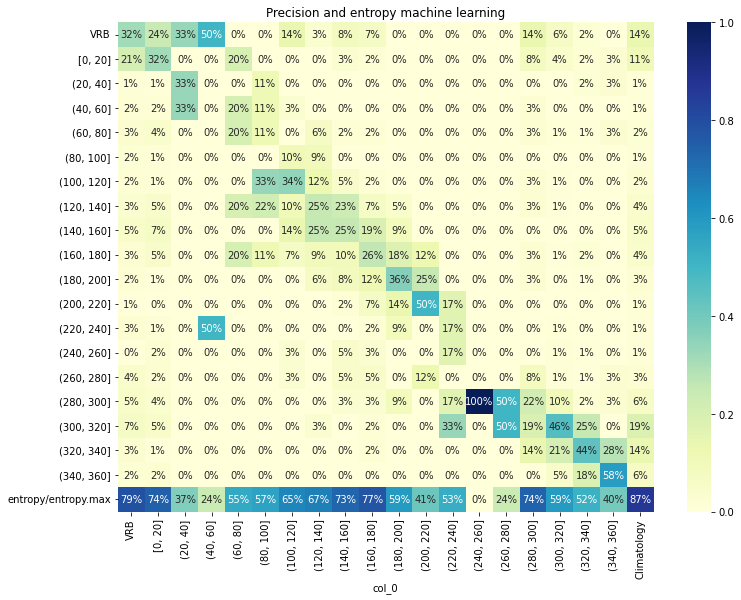

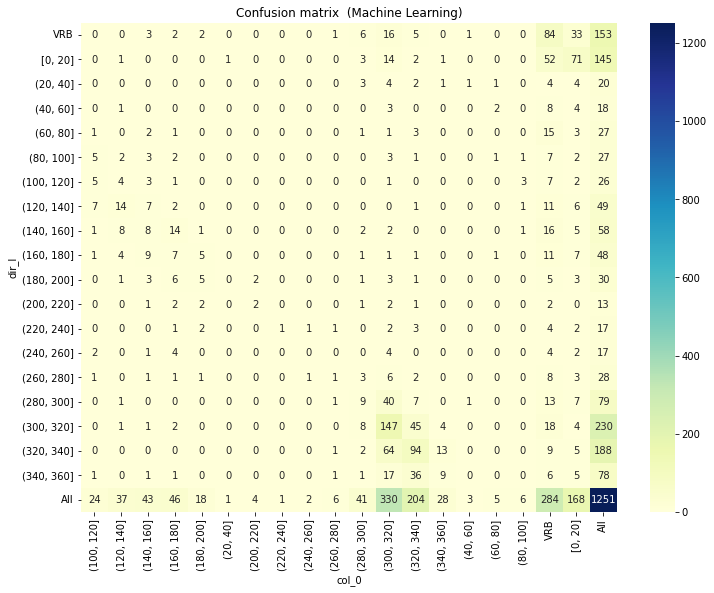

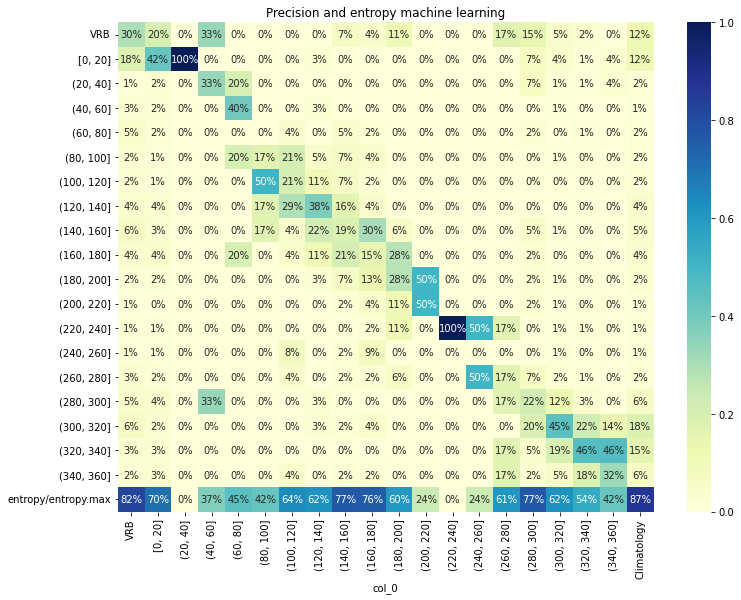

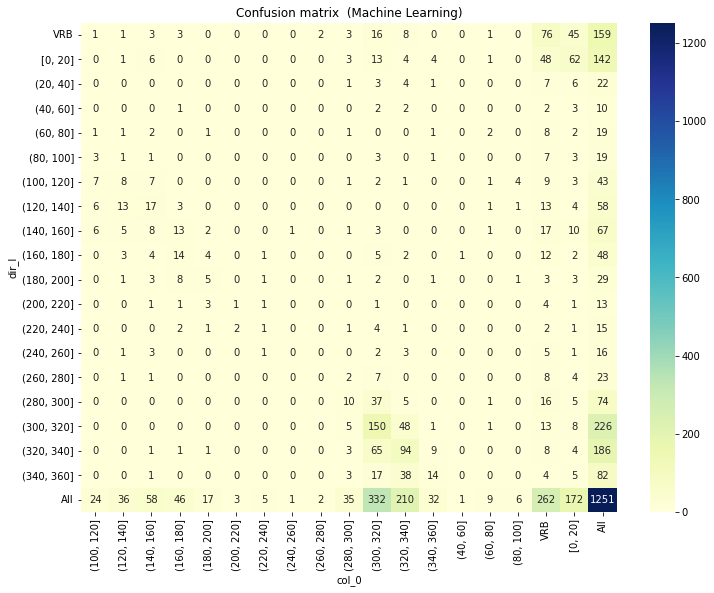

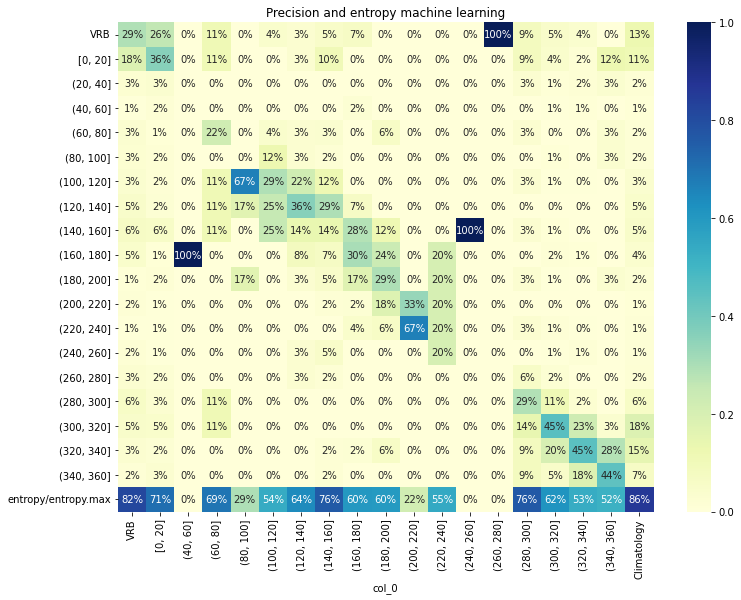

In [62]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# X and Y
Y = df_vrb.dir_l
X = df_vrb.iloc[:,2:]

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

# mean accuracy machine learning sample after add time variables
acc_ml_a = []

# loop random
for t in range (0,5):

  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_a.append(round(accuracy_score(y_test, y_pred),2))

  
  #Confusion matrix
  plt.figure(figsize=(12, 9))
  plt.title("Confusion matrix  (Machine Learning)")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  plt.figure(figsize=(12, 9))
  plt.title("Precision and entropy machine learning")
  column_sc = pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
  column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
  comuns = [element for element in labels+["Climatology"] if element in column_sc.columns]                  
  sns.heatmap(column_sc[comuns],annot=True,cmap="YlGnBu",fmt='.0%');
 

  #quality report
  print("\n Quality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nAccuracy mean of samples trained with time variables: ",acc_ml_a)

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample without time variables is less than the mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [63]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_a, alternative="less")

print("\nmeans without time variables:", acc_ml)
print("\nmeans with time variables:", acc_ml_a)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the mean of the sample without time variables inputs is less than the mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables ")




means without time variables: [0.35, 0.36, 0.37, 0.37, 0.37]

means with time variables: [0.35, 0.36, 0.37, 0.37, 0.37]

alpha:  0.01

p_value point:  nan

we are accepting null hypothesis:  H0: accuracy mean machine learning without time variables = accuracy mean machine learning with time variables 


In [64]:
X.columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'hour', 'month', 'dayofyear', 'weekofyear'],
      dtype='object')

In [65]:
import pickle
from sklearn.pipeline import Pipeline

x_var = X.columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("dir_LEPP_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
